Loading up the Excel file and initial visualisations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Kemondo_Sales = pd.read_excel('/content/sample_data/Sales_Tzs_April_2024_Nov_2025.xlsx')


In [ ]:
Kemondo_Sales.columns

Index(['Date', 'Sales'], dtype='object')

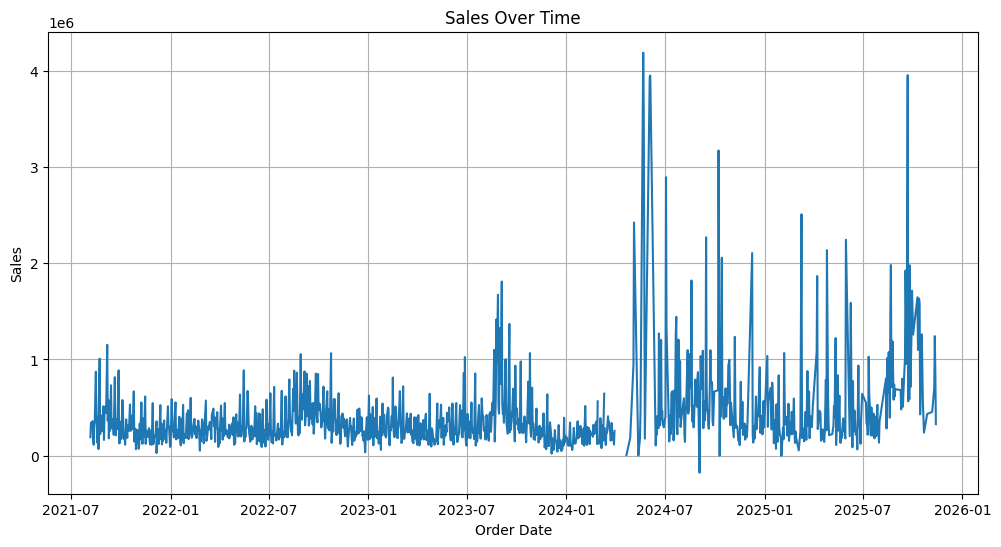

In [ ]:


plt.figure(figsize=(12, 6))
plt.plot(Kemondo_Sales['Date'], Kemondo_Sales['Sales'])
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.show()

In [ ]:
Kemondo_Sales.describe()

,Date,Sales
count,1189,1.185000e+03
mean,2023-07-28 06:04:32.497897472,3.993789e+05
min,2021-08-06 00:00:00,-1.770000e+05
25%,2022-07-19 00:00:00,1.990000e+05
50%,2023-06-30 00:00:00,2.880000e+05
75%,2024-08-14 00:00:00,4.455000e+05
max,2025-11-13 00:00:00,4.186040e+06
std,NaN,4.025845e+05


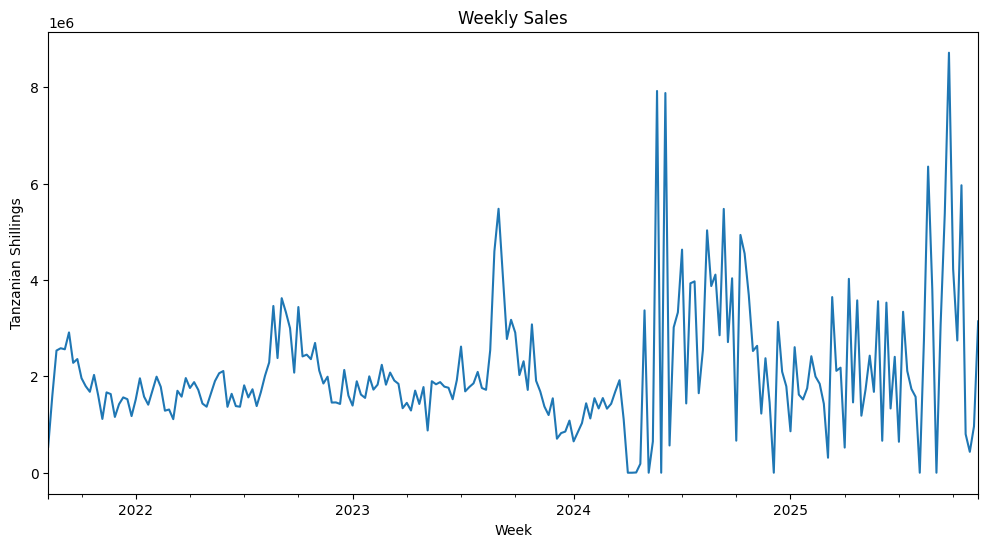

/tmp/ipython-input-1796018049.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = Kemondo_Sales['Sales'].resample('M').sum()


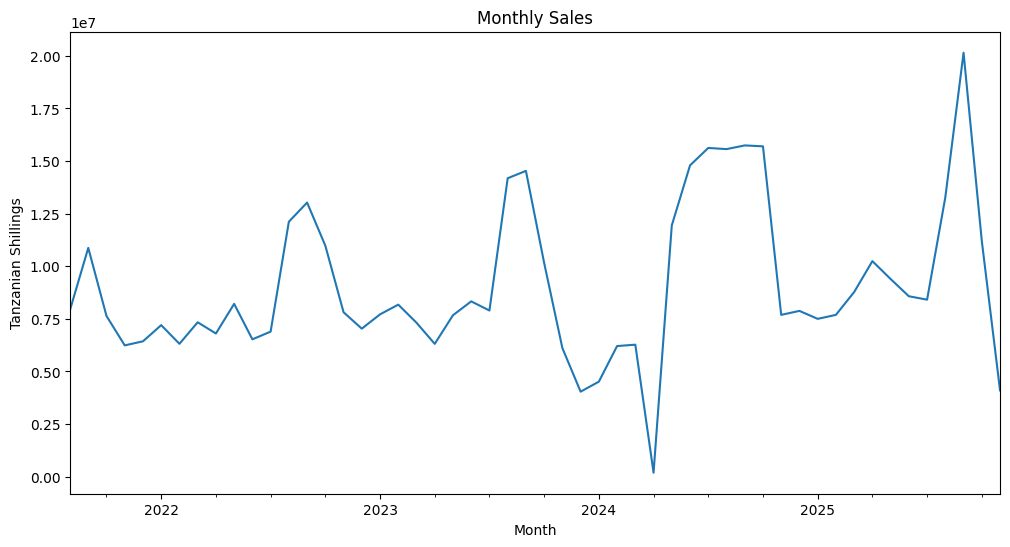

In [ ]:

# Setting the Date column as the index
Kemondo_Sales = Kemondo_Sales.set_index('Date')

# Aggregating weekly sales
weekly_sales = Kemondo_Sales['Sales'].resample('W').sum()

# Plotting weekly sales
plt.figure(figsize=(12, 6))
weekly_sales.plot(title='Weekly Sales')
plt.ylabel('Tanzanian Shillings')
plt.xlabel('Week')
plt.show()

# Aggregating monthly sales
monthly_sales = Kemondo_Sales['Sales'].resample('M').sum()

# Plotting monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales')
plt.ylabel('Tanzanian Shillings')
plt.xlabel('Month')
plt.show()

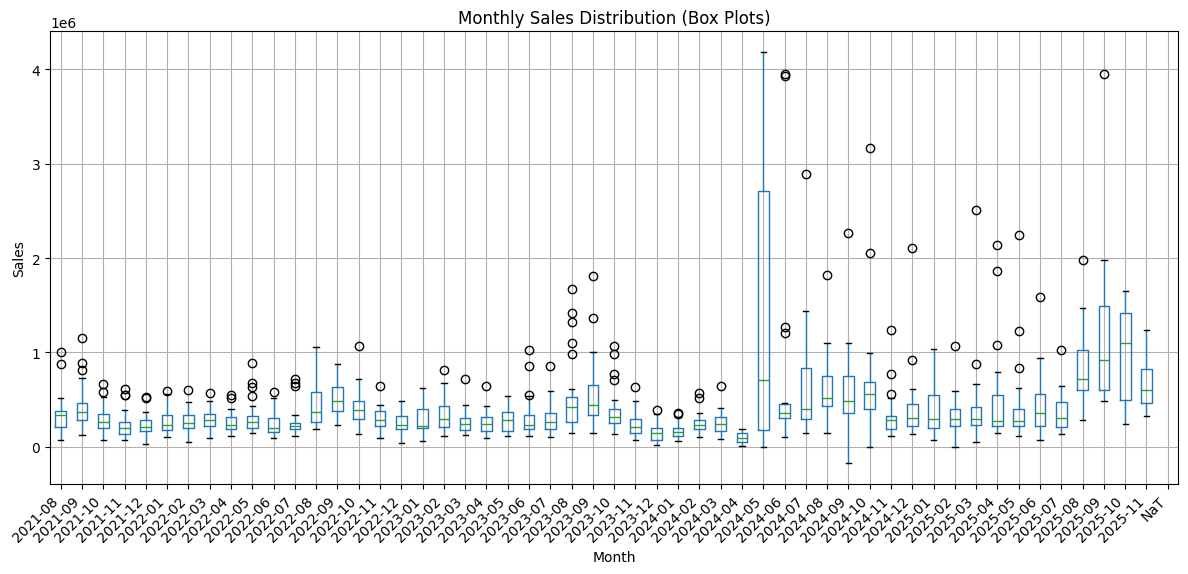

In [ ]:
# Monthly Box Plots

plt.figure(figsize=(12, 6))
Kemondo_Sales['Month'] = Kemondo_Sales.index.to_period('M').astype(str)
Kemondo_Sales.boxplot(column='Sales', by='Month', ax=plt.gca())
plt.title('Monthly Sales Distribution (Box Plots)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
Kemondo_Sales.drop('Month', axis=1, inplace=True)

Missing values

In [ ]:
# Checking for missing timestamps (daily frequency)
expected_range = pd.date_range(start=Kemondo_Sales.index.min(), end=Kemondo_Sales.index.max(), freq='D')
missing_dates = expected_range.difference(Kemondo_Sales.index)

print(f"Number of missing timestamps: {len(missing_dates)}")

Number of missing timestamps: 383


In [ ]:
# Checking for empty "Sales" values
print('Missing values per column:')
print(Kemondo_Sales.isnull().sum())

Missing values per column:
Sales    5
dtype: int64


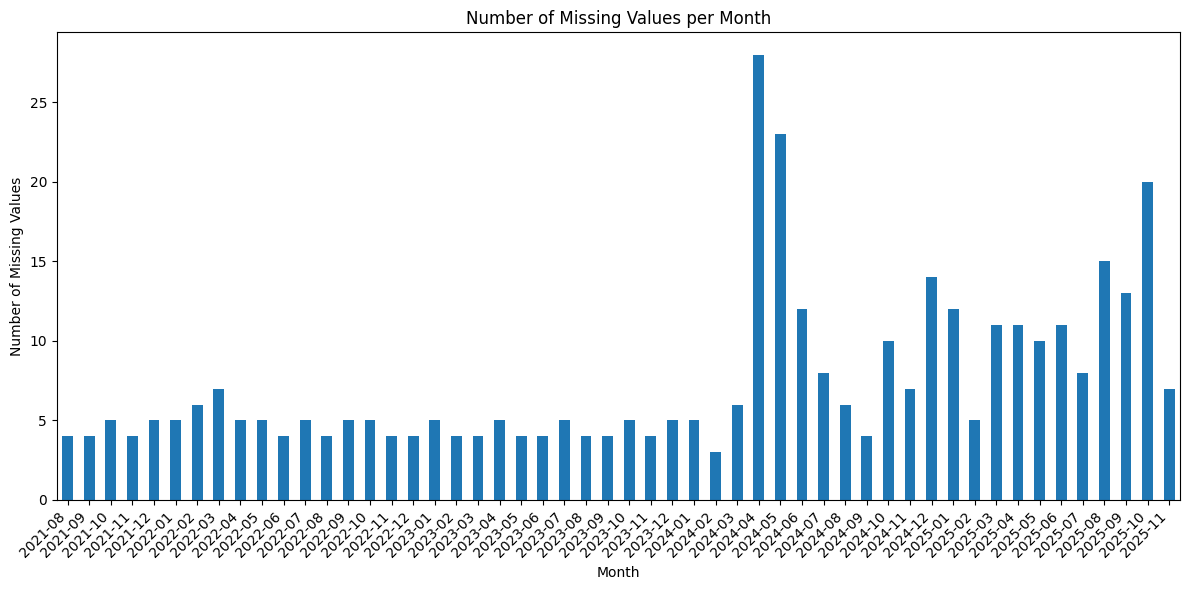

In [ ]:
# Counting missing values per month
missing_by_month = pd.Series(missing_dates).dt.to_period('M').value_counts().sort_index()

# Converting the index to strings for plotting
missing_by_month.index = missing_by_month.index.astype(str)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
missing_by_month.plot(kind='bar')
plt.title('Number of Missing Values per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Weekly and Monthly visualisations

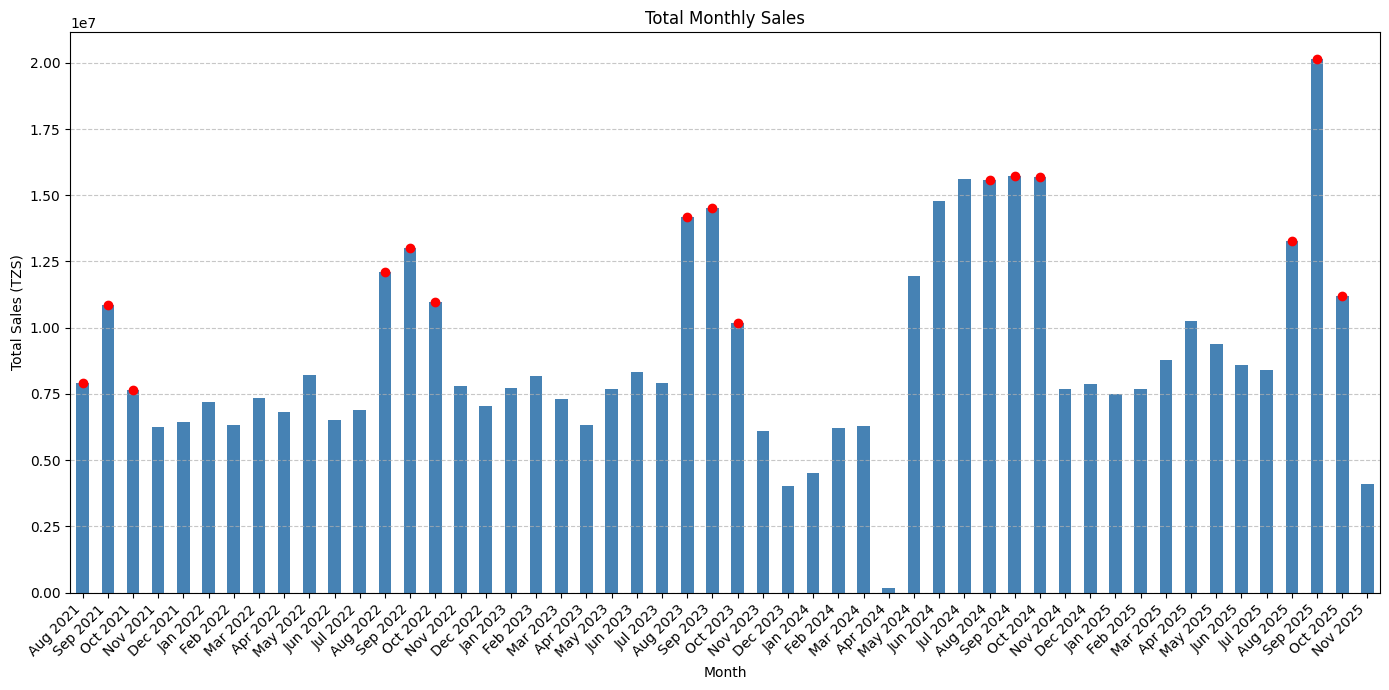

In [ ]:
# Aggregating Monthly Total Sales


plt.figure(figsize=(14, 7))
ax = monthly_sales.plot(kind='bar', color='steelblue')

plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (TZS)')


ax.set_xticklabels([d.strftime('%b %Y') for d in monthly_sales.index], rotation=45, ha='right')

# Red dots for months 8, 9, 10 (Aug, Sep, Oct) at the bar tips
for i, (d, v) in enumerate(monthly_sales.items()):
    if d.month in [8, 9, 10]:
        ax.scatter(i, v, color='red', zorder=5)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


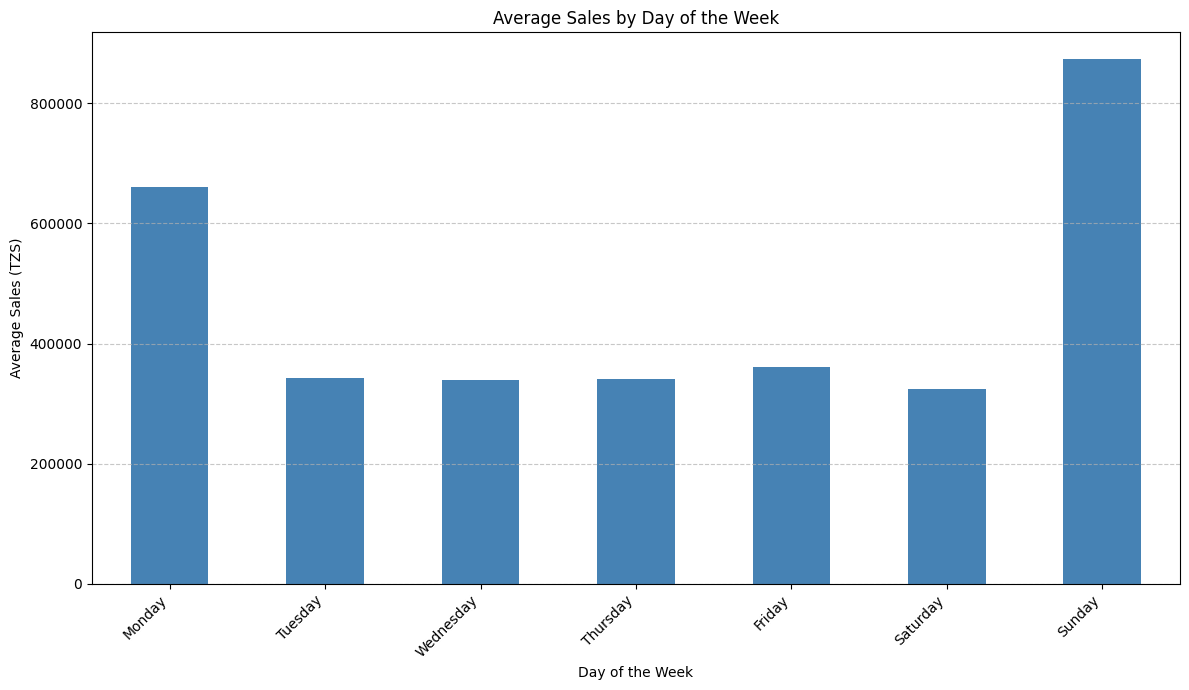

In [ ]:


if 'Day of Week' not in Kemondo_Sales.columns:
  Kemondo_Sales['Day of Week'] = Kemondo_Sales.index.dayofweek

# Calculating average sales by day of the week
average_sales_by_day = Kemondo_Sales.groupby('Day of Week')['Sales'].mean()

# Defining day names for plotting
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the bar graph
plt.figure(figsize=(12, 7))
average_sales_by_day.plot(kind='bar', color='steelblue')


plt.xticks(ticks=range(7), labels=day_names, rotation=45, ha='right')

plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales (TZS)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

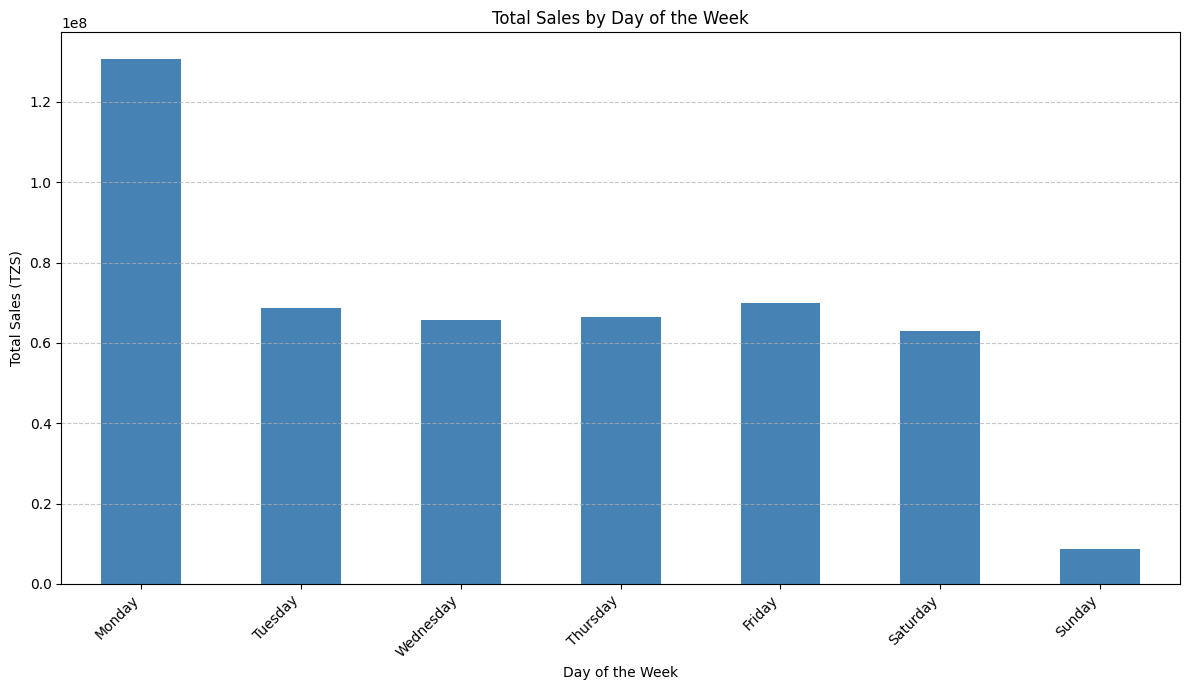

In [ ]:


# Calculate total sales by day of the week
total_sales_by_day = Kemondo_Sales.groupby('Day of Week')['Sales'].sum()

# Define day names for plotting
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the bar graph
plt.figure(figsize=(12, 7))
total_sales_by_day.plot(kind='bar', color='steelblue')

# Set custom tick labels for the x-axis to show day names
plt.xticks(ticks=range(7), labels=day_names, rotation=45, ha='right')

plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (TZS)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Additive decompositions

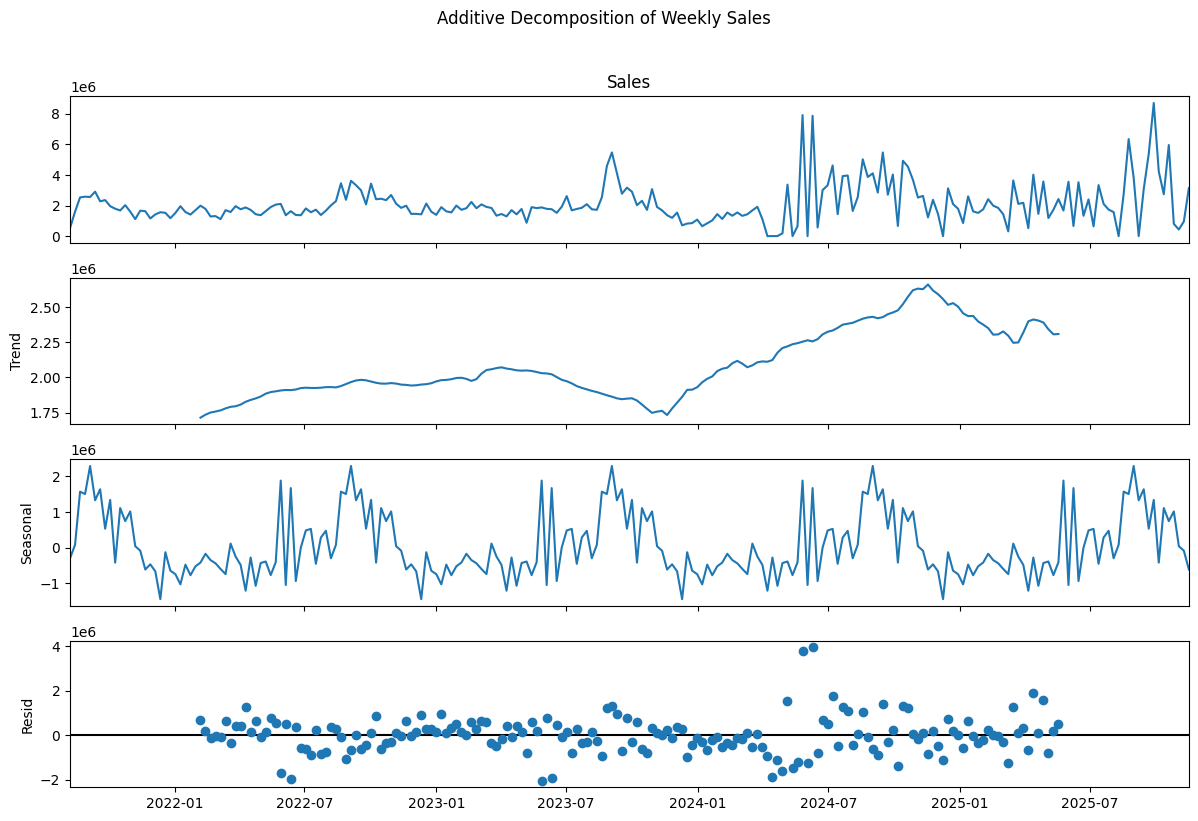

In [ ]:


# Performing additive decomposition on weekly sales
decomposition_weekly_additive = seasonal_decompose(weekly_sales.dropna(), model='additive')

# Plotting the additive decomposition components for weekly sales
fig_additive_weekly = decomposition_weekly_additive.plot()
fig_additive_weekly.set_size_inches((12, 8))
fig_additive_weekly.suptitle('Additive Decomposition of Weekly Sales', y=1.02)
plt.tight_layout()
plt.show()



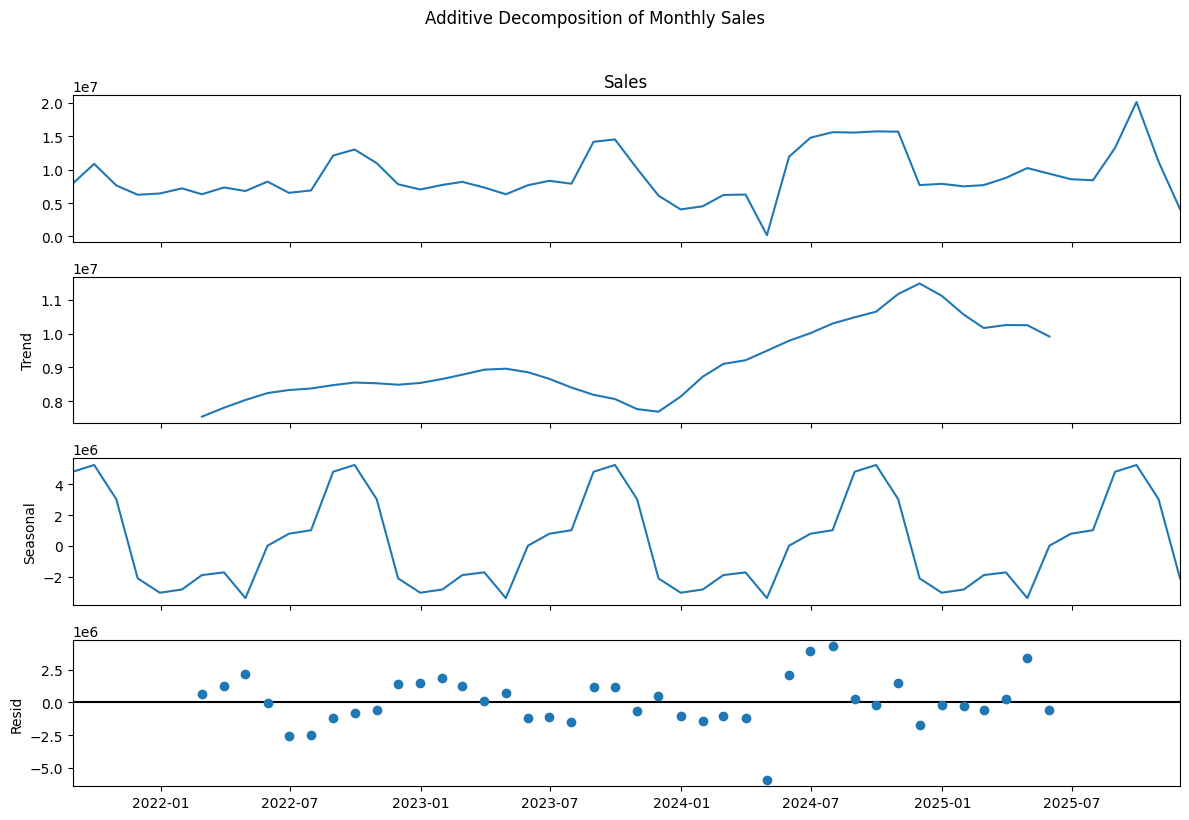

In [ ]:
# Performing additive decomposition on monthly sales
decomposition_monthly_additive = seasonal_decompose(monthly_sales.dropna(), model='additive')

# Plotting the additive decomposition components for monthly sales
fig_additive_monthly = decomposition_monthly_additive.plot()
fig_additive_monthly.set_size_inches((12, 8))
fig_additive_monthly.suptitle('Additive Decomposition of Monthly Sales', y=1.02)
plt.tight_layout()
plt.show()

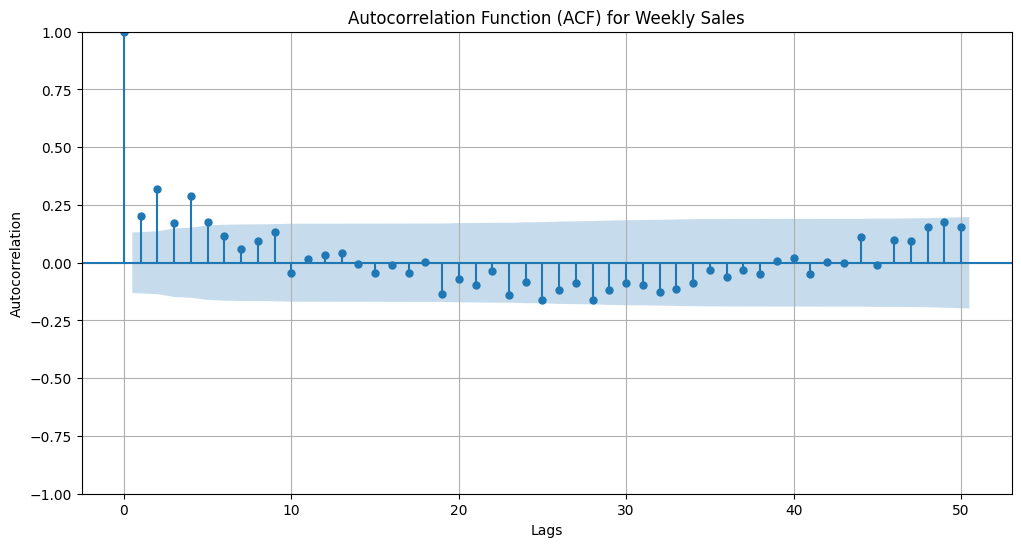

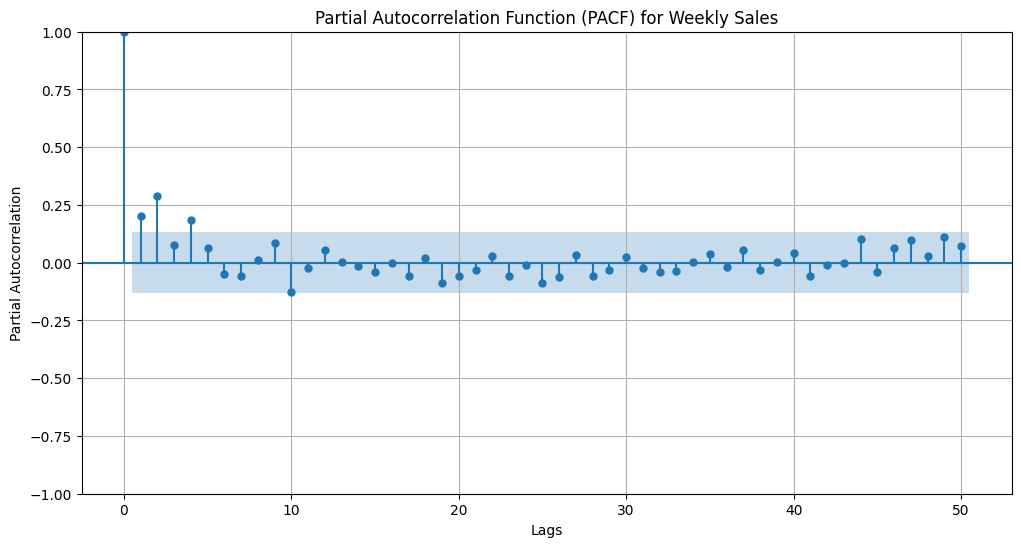

In [ ]:


# ACF plot for weekly sales
plt.figure(figsize=(12, 6))
plot_acf(weekly_sales.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Weekly Sales')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# PACF plot for weekly sales
plt.figure(figsize=(12, 6))
plot_pacf(weekly_sales.dropna(), lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Weekly Sales')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

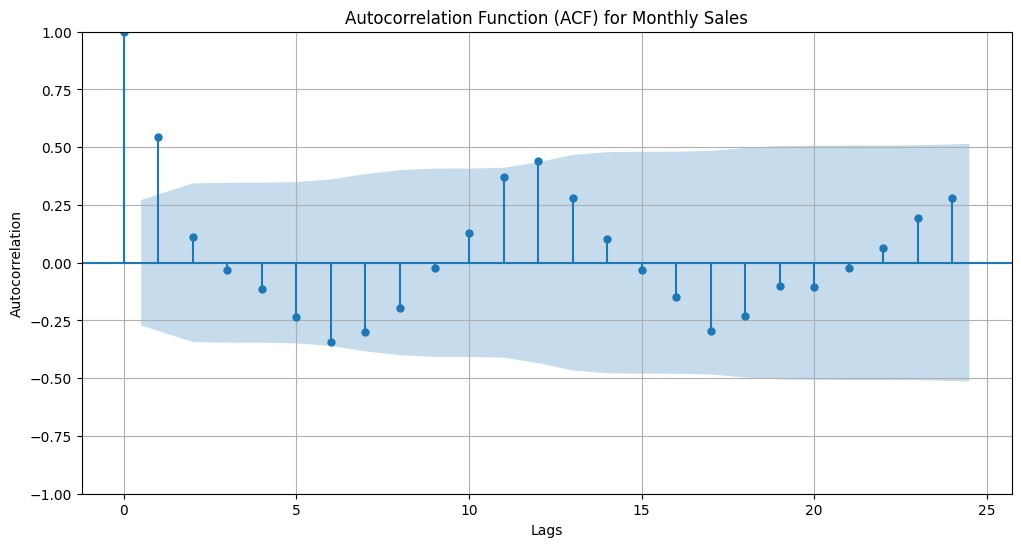

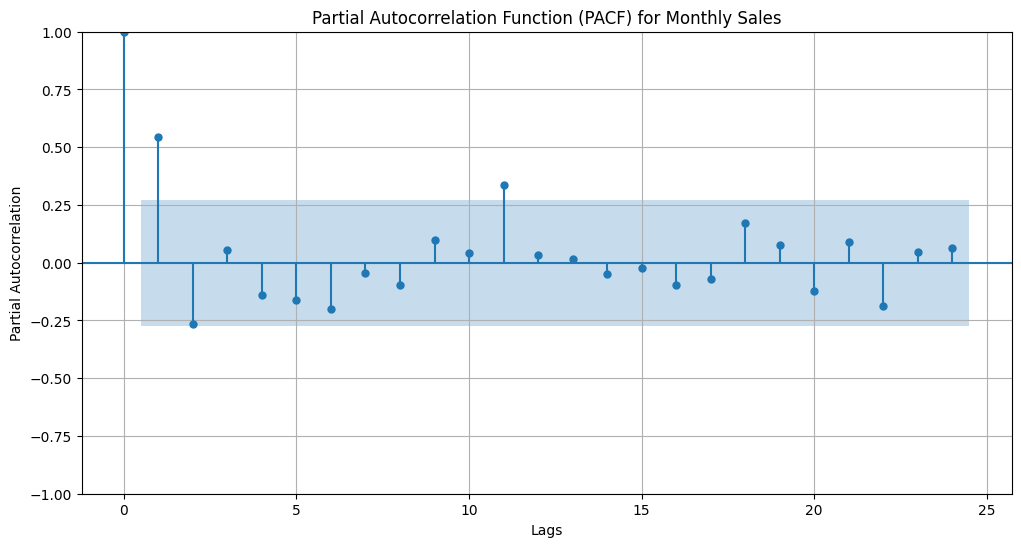

In [ ]:

# ACF plot for monthly sales
plt.figure(figsize=(12, 6))
plot_acf(monthly_sales.dropna(), lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Monthly Sales')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# PACF plot for monthly sales
plt.figure(figsize=(12, 6))
plot_pacf(monthly_sales.dropna(), lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Monthly Sales')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

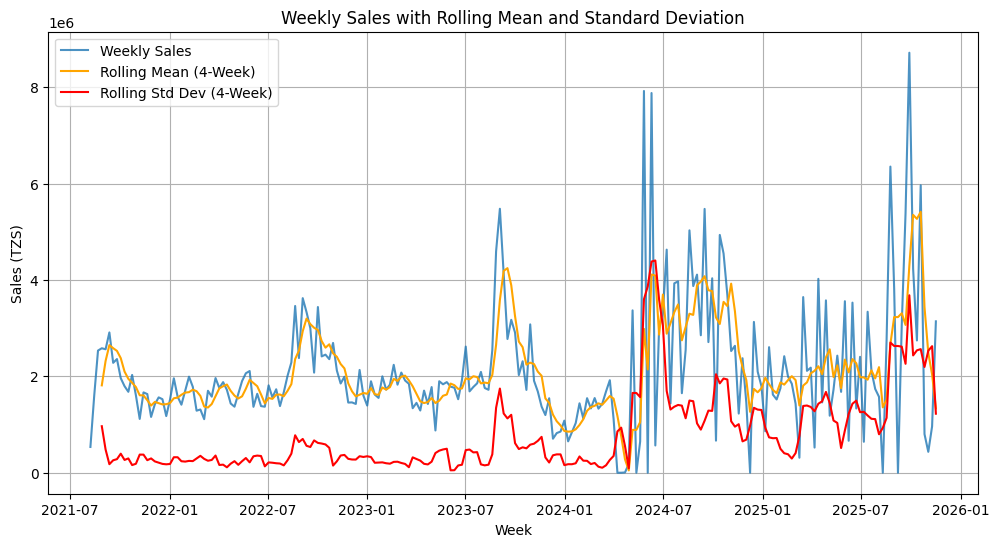

In [ ]:

weekly_sales = Kemondo_Sales['Sales'].resample('W').sum()



rolling_mean_weekly = weekly_sales.rolling(window=4).mean()
rolling_std_weekly = weekly_sales.rolling(window=4).std()


plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales, label='Weekly Sales', alpha=0.8)
plt.plot(rolling_mean_weekly.index, rolling_mean_weekly, label='Rolling Mean (4-Week)', color='orange')
plt.plot(rolling_std_weekly.index, rolling_std_weekly, label='Rolling Std Dev (4-Week)', color='red')

plt.title('Weekly Sales with Rolling Mean and Standard Deviation')
plt.xlabel('Week')
plt.ylabel('Sales (TZS)')
plt.legend()
plt.grid(True)
plt.show()

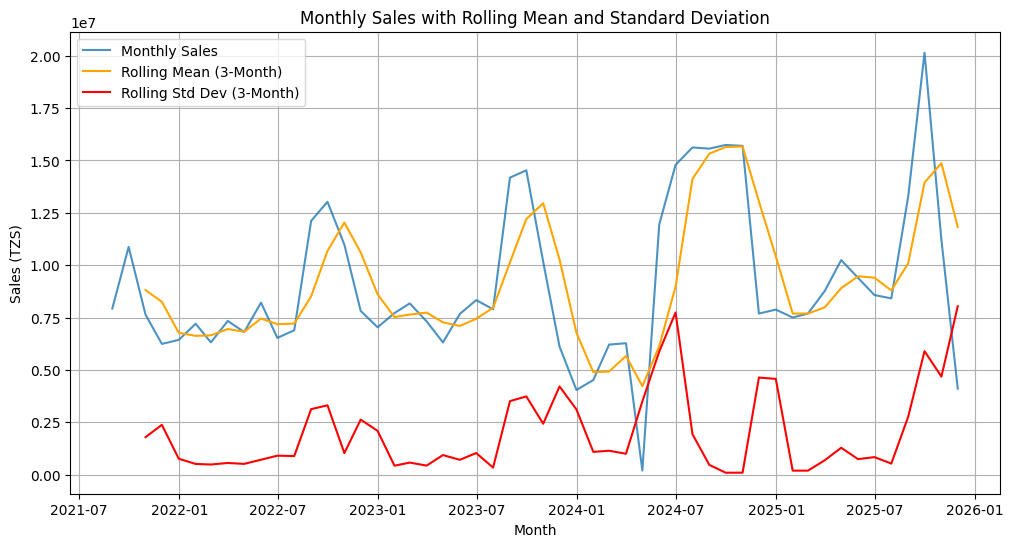

In [ ]:


rolling_mean_monthly = monthly_sales.rolling(window=3).mean()
rolling_std_monthly = monthly_sales.rolling(window=3).std()


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales', alpha=0.8)
plt.plot(rolling_mean_monthly.index, rolling_mean_monthly, label='Rolling Mean (3-Month)', color='orange')
plt.plot(rolling_std_monthly.index, rolling_std_monthly, label='Rolling Std Dev (3-Month)', color='red')

plt.title('Monthly Sales with Rolling Mean and Standard Deviation')
plt.xlabel('Month')
plt.ylabel('Sales (TZS)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install statsmodels

from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series, series_name):
    result = adfuller(series.dropna())
    print(f'\nADF Test Results for {series_name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    if result[1] <= 0.05:
        print(f'{series_name}: Data is likely stationary (reject null hypothesis).')
    else:
        print(f'{series_name}: Data is likely non-stationary (fail to reject null hypothesis).')

# Performing ADF test on weekly sales
perform_adf_test(weekly_sales, 'Weekly Sales')

# Performing ADF test on monthly sales
perform_adf_test(monthly_sales, 'Monthly Sales')


ADF Test Results for Weekly Sales:
ADF Statistic: -4.377243189917993
p-value: 0.00032560254630356475
Critical Values:
	1%: -3.4604283689894815
	5%: -2.874768966942149
	10%: -2.57382076446281
Weekly Sales: Data is likely stationary (reject null hypothesis).

ADF Test Results for Monthly Sales:
ADF Statistic: -4.3264339283349535
p-value: 0.00039965116160790956
Critical Values:
	1%: -3.568485864
	5%: -2.92135992
	10%: -2.5986616
Monthly Sales: Data is likely stationary (reject null hypothesis).
